In [1]:
import pandas as pd
import numpy as np
import spacy
import pandas as pd
import scattertext as st
from spacy.lang.en import English
from textblob import TextBlob
import seaborn as sns

In [2]:
df = pd.read_excel('data/2021MCMProblemC_DataSet.xlsx')

In [3]:
df.head()

,DetectionDate,date,Notes,Lab Status,label,LabComments,Latitude,Longitude
0,2020-07-11,193,,Negative ID,2,Western cicada killer.,47.450510,-120.359030
1,2020-08-07,220,,Negative ID,2,Thanks for the submission. That was a Cicada k...,46.210088,-119.759287
2,2020-08-22,235,,Negative ID,2,Thanks for the submission. That is a horntail ...,47.629840,-120.689450
3,2020-07-28,210,,Negative ID,2,Thanks for the submission. That is a Cicada ki...,47.445464,-120.267607
4,2020-07-15,197,,Negative ID,2,Cicada killer,47.143276,-119.852737


In [4]:
def func(longitude,latitude,month):
    if (latitude + 112.38)**2+(longitude-40.077)**2<=180:
        if month in [8,9,10,11,12,1]:
            return 1
    if (latitude + 89.64)**2+(longitude-33.94)**2<=136.25 or (latitude + 92.22)**2+(longitude-44.55)**2<=101:
        if month in [3,4,5,6,7,2]:
            return 1
    return 0

In [5]:
df['notes_polarity'] = df.apply(lambda x: TextBlob(x.Notes).sentiment.polarity, axis=1)
df['notes_subjectivity'] = df.apply(lambda x: TextBlob(x.Notes).sentiment.subjectivity, axis=1)
df['comments_polarity'] = df.apply(lambda x: TextBlob(x.LabComments).sentiment.polarity, axis=1)
df['comments_subjectivity'] = df.apply(lambda x: TextBlob(x.LabComments).sentiment.subjectivity, axis=1)
df['best_season'] = df.apply(lambda x:func(x.Latitude,x.Longitude,x.DetectionDate.month),axis=1)

In [6]:
df=df.drop(columns=['DetectionDate','Notes','Lab Status','LabComments'])

In [7]:
df.to_csv('processed_data.csv',index=False)

In [8]:
test = df[df['label']=='1'].drop(columns=['label'])
test.to_csv('test_data.csv',index=False)

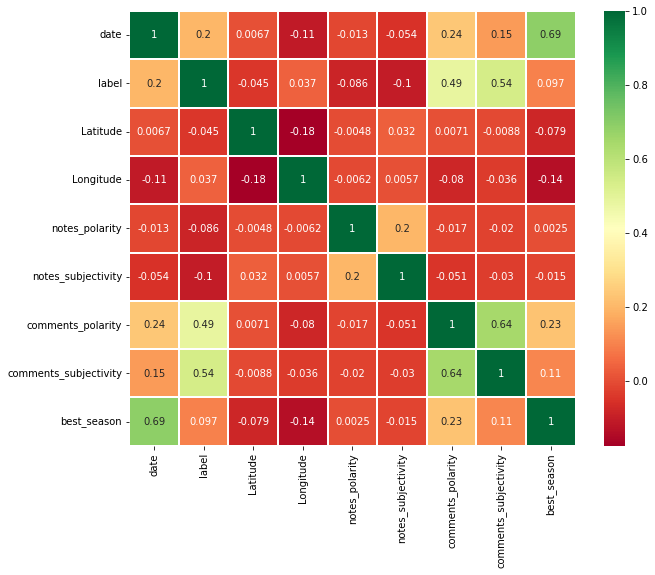

In [9]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)  #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()